# 스타2 종족별 선택 횟수, 승률 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
train=pd.read_csv('train.csv')
train.head()

,game_id,winner,time,player,species,event,event_contents
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
2,0,1,0.02,0,T,Selection,['OrbitalCommand [3080001]']
3,0,1,0.02,0,T,Ability,(1360) - TrainSCV
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)"


In [3]:
# 특정 항목의 데이터만 
df=train[['game_id','winner','player','species']]
df=df.drop_duplicates().reset_index(drop=True) 
# drop_duplicates : 중복 데이터 처리
df['win']=(df['winner']==df['player'])
df=df.drop(['winner'],axis=1)
df.head()

,game_id,player,species,win
0,0,0,T,False
1,0,1,T,True
2,1,1,T,True
3,1,0,P,False
4,2,1,Z,False


### 1. 종족 선택 수

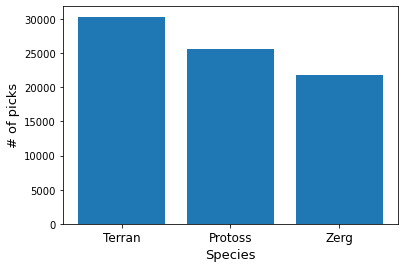

In [4]:
label=['Terran','Protoss','Zerg']
index=np.arange(len(label))

plt.bar(index,df['species'].value_counts())
plt.xlabel('Species',fontsize=13)
plt.ylabel('# of picks',fontsize=13)
plt.xticks(index,label,fontsize=12)
plt.show()

전체 게임에서 각 종족이 몇번 선택되었는지 종족 선택수를 그림

선택횟수는 테란, 프로토스, 저그 순으로 높은 것을 확인할 수 있다

### 2. 종족간 승률

In [6]:
game_ids=df['game_id'].unique()

wins=df.loc[df['win']==True]
loses=df.loc[df['win']==False]

game={
    'TvT':0, 'TvP':0, 'TvZ':0,
    'PvT':0, 'PvP':0, 'PvZ':0,
    'ZvT':0, 'ZvP':0, 'ZvZ':0,
}

for game_id in game_ids:
    win=wins[wins['game_id']==game_id]['species'].iloc[0]
    lose=loses[loses['game_id']==game_id]['species'].iloc[0]
    
    if (win == 'T') and (lose == 'T'):
        game['TvT'] += 1
    elif (win == 'T') and (lose == 'P'):
        game['TvP'] += 1
    elif (win == 'T') and (lose == 'Z'):
        game['TvZ'] += 1
        
    elif (win == 'P') and (lose == 'T'):
        game['PvT'] += 1
    elif (win == 'P') and (lose == 'P'):
        game['PvP'] += 1
    elif (win == 'P') and (lose == 'Z'):
        game['PvZ'] += 1
        
    elif (win == 'Z') and (lose == 'T'):
        game['ZvT'] += 1
    elif (win == 'Z') and (lose == 'P'):
        game['ZvP'] += 1
    elif (win == 'Z') and (lose == 'Z'):
        game['ZvZ'] += 1
    else:
        raise ValueError
# raise : 프로그래머가 지정한 예외가 발생하도록 강제할 수 있게 함

In [8]:
print('테란 vs 프로토스')
print('T: %.2f %%'%(
    100*game['TvP']/(game['TvP']+game['PvT'])
))
print('P: %.2f %% \n'%(
    100*game['PvT']/(game['TvP']+game['PvT'])
))

print('프로토스 vs 저그')
print('P: %.2f %%'%(
    100*game['PvZ']/(game['PvZ']+game['ZvP'])
))
print('Z: %.2f %% \n'%(
    100*game['ZvP']/(game['PvZ']+game['ZvP'])
))

print('저그 vs 테란')
print('Z: %.2f %%'%(
    100*game['ZvT']/(game['TvZ']+game['ZvT'])
))
print('T: %.2f %%'%(
    100*game['TvZ']/(game['TvZ']+game['ZvT'])
))

테란 vs 프로토스
T: 49.88 %
P: 50.12 % 

프로토스 vs 저그
P: 48.79 %
Z: 51.21 % 

저그 vs 테란
Z: 50.65 %
T: 49.35 %


테란이 선택 횟수는 높지만 승률은 프로토스전 49.88%, 저그전 49.35% 으로 낮은 것을 확인할 수 있었습니다.
반면 저그의 경우 테란, 프로토스 모두에 대해 승률이 50.65%, 51.21% 로 우세합니다.

### 3. 결론
테란: 높은 선택 횟수, 낮은 승률

저그: 낮은 선택 횟수, 높은 승률

프로토스: 중간 선택 횟수, 테란에게는 강하나 저그한테 열세